In [61]:
import pandas as pd

In [62]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

In [63]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [64]:
data.duplicated().sum()

np.int64(0)

In [65]:
data.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [66]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
data['churn'].value_counts()

,count
churn,
0,7963
1,2037


<Axes: xlabel='churn', ylabel='count'>

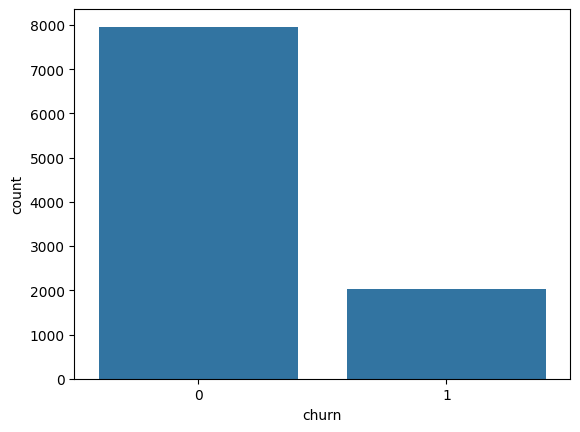

In [68]:
import  seaborn as sns

sns.countplot (x='churn',data=data)

In [69]:
X = data.drop('churn', axis=1)
y = data['churn']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Naive Bias**

In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['country'] = le.fit_transform(X['country'])

In [72]:
X = pd.get_dummies(X, columns=['country'])

In [73]:
# One-hot encode 'country' and 'gender' after the split
X_train = pd.get_dummies(X_train, columns=['country', 'gender'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['country', 'gender'], drop_first=True)

In [74]:
from sklearn.naive_bayes import GaussianNB

model_2 = GaussianNB()
model_2.fit(X_train, y_train)

GaussianNB()

**Decision Tree**

In [75]:
from sklearn.tree import DecisionTreeClassifier

model_3 = DecisionTreeClassifier()
model_3.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
# Assuming model_1 is a previously trained model (e.g., Logistic Regression)
# If not, you'll need to train model_1 first or remove it from this cell.
# pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)

In [77]:

from sklearn.metrics import accuracy_score

print(f'Naive Bais: {accuracy_score(y_test, pred_2)}')
print(f'Decision Tree: {accuracy_score(y_test, pred_3)}')

Naive Bais: 0.791
Decision Tree: 0.7795
